## 1. Read data

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

tags = pd.read_csv("https://github.com/tiagofassoni/useful-datasets/raw/main/ml-latest-small/tags.csv")
links = pd.read_csv("https://github.com/tiagofassoni/useful-datasets/raw/main/ml-latest-small/links.csv")
movies = pd.read_csv("https://github.com/tiagofassoni/useful-datasets/raw/main/ml-latest-small/movies.csv")
ratings = pd.read_csv("https://github.com/tiagofassoni/useful-datasets/raw/main/ml-latest-small/ratings.csv")

# Tags Table Exploration

## columns:  

userId

movieId

tag: Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase.

timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [55]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [56]:
tags.tail()

,userId,movieId,tag,timestamp
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


In [57]:
tags.shape

(3683, 4)

In [58]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [59]:
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit = 's')

tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


In [60]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB


### AS column 'tag' has categorical data. we would see now how many categories are there

In [61]:
tags['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: tag, Length: 1589, dtype: int64

column 'tag' has 1589 categories and each Category has some number of entries

# Find any missing values present in this Tags table

In [62]:
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

# links table exploration:

### columns:

movieId

imdbId

tmdbId


In [63]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [64]:
links.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


In [65]:
links.shape

(9742, 3)

In [66]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


# Find any missing values present in links table

In [67]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

### since column 'tmdbId' has 8 missing rows over 9742 rows. so, simply deleting those rows as missing values contribution is less

In [68]:
links = links.loc[~(links['tmdbId'].isna())]

In [69]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

# movies table exploration

### columns:

movieId

title

genres

In [70]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [72]:
before = movies.shape
before

(9742, 3)

In [73]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Find any duplicate entries present in movies['title'] column

In [74]:
movies.duplicated(subset = 'title', keep = 'first').sum()

5

In [75]:
movies.duplicated(subset = 'title', keep = 'first').value_counts()

False    9737
True        5
dtype: int64

# Extracting these 5 duplicated titles

In [76]:
movies.loc[movies.duplicated(subset ='title'), :]

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


# dropping duplicates

In [77]:
movies.drop_duplicates(subset = 'title', keep = 'first', inplace  = True)

In [78]:
#movies = movies[~(movies.index.duplicated())]

In [79]:
after = movies.shape
after

(9737, 3)

In [80]:
print(f' rows before delete: {before[0]}')
print(f' rows after delete: {after[0]}')

 rows before delete: 9742
 rows after delete: 9737


In [81]:
movies['title'].duplicated(keep = 'first').sum()

0

# ratings table exploration

### columns: 

userId

movieId

rating

timestamp

In [82]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [83]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [84]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [85]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [86]:
ratings.shape

(100836, 4)

# Find any missing values present

In [87]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# Find all whose rating is greater than or equal to 4

In [88]:
ratings.loc[ratings['rating'] >= 4]

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47


In [89]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

# Histogram Plot

### rating distribution

Text(0, 0.5, 'No of Movies')

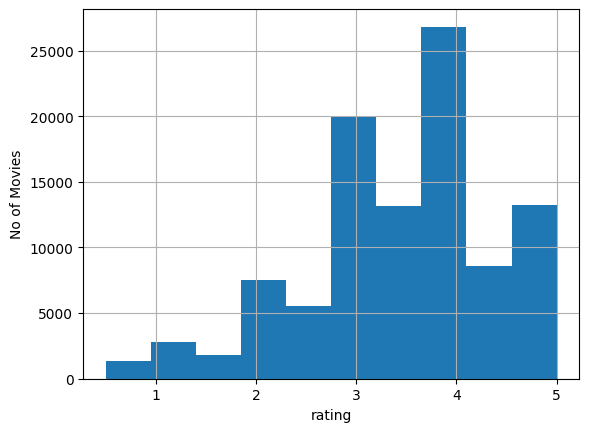

In [90]:
ratings['rating'].hist()
plt.xlabel('rating')
plt.ylabel('No of Movies')

## Popularity/Quality based recommmender system

# find out best popular genres

In [91]:
movies_ratings =  pd.merge(movies, ratings, on = 'movieId')


In [92]:
movies_ratings_1 = pd.DataFrame(movies_ratings.groupby(['genres'])['rating'].mean())
movies_ratings_1.sort_values('rating', ascending =  False)

,rating
genres,
Comedy|Crime|Drama|Horror,5.0
Adventure|Comedy|Fantasy|Musical,5.0
Animation|Children|Mystery,5.0
Animation|Drama|Sci-Fi|IMAX,5.0
Adventure|Drama|Fantasy|Horror|Sci-Fi,5.0
...,...
Action|Adventure|Comedy|Sci-Fi|IMAX,0.5
Comedy|Fantasy|Horror|Sci-Fi,0.5
Crime|Horror|Sci-Fi,0.5


In [93]:
movies_ratings_1['rating_count'] = movies_ratings.groupby(['genres'])['rating'].count()

#finding out most popular genres
movies_ratings_1.sort_values("rating_count", ascending=False)

,rating,rating_count
genres,,
Comedy,3.197888,7196
Drama,3.688841,6291
Comedy|Romance,3.320015,3967
Comedy|Drama|Romance,3.550500,3000
Comedy|Drama,3.517187,2851
...,...,...
Crime|Drama|Film-Noir|Romance,3.500000,1
Crime|Drama|Film-Noir|Romance|Thriller,4.000000,1
Adventure|Fantasy|Musical|Romance,3.500000,1


In [94]:
# high rating_count means popular

# Best genres with high rated and popular considering rating>= 3.0 and popular>= 3000 

movies_ratings_1.loc[(movies_ratings_1['rating']>= 3.0) & (movies_ratings_1['rating_count'] >= 3000)]

,rating,rating_count
genres,,
Comedy,3.197888,7196
Comedy|Drama|Romance,3.550500,3000
Comedy|Romance,3.320015,3967
Drama,3.688841,6291


# find out best popular movies

In [95]:
movies_ratings_1 = pd.DataFrame(movies_ratings.groupby(['title'])['rating'].mean())
movies_ratings_1.sort_values('rating', ascending =  False)

,rating
title,
Tom Segura: Mostly Stories (2016),5.0
Winter in Prostokvashino (1984),5.0
The Adventures of Sherlock Holmes and Doctor Watson: The Treasures of Agra (1983),5.0
The Adventures of Sherlock Holmes and Dr. Watson: Bloody Signature (1979),5.0
When Worlds Collide (1951),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


In [96]:
#add rating_count column: how many times this movies has been rated
movies_ratings_1['rating_count'] = movies_ratings.groupby(['title'])['rating'].count()
movies_ratings_1.sort_values("rating_count", ascending=False)

,rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1
King Kong Lives (1986),2.000000,1


In [97]:
# set a threshold Value to rating : >= 3.5
best_movies = movies_ratings_1[movies_ratings_1['rating']>= 3.5].sort_values("rating_count", ascending=False)
best_movies

,rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
Ken Park (2002),4.500000,1
Kevin Hart: I'm a Grown Little Man (2009),4.500000,1
Kevin Hart: Laugh at My Pain (2011),3.500000,1


In [98]:
best_movies.reset_index()

,title,rating,rating_count
0,Forrest Gump (1994),4.164134,329
1,"Shawshank Redemption, The (1994)",4.429022,317
2,Pulp Fiction (1994),4.197068,307
3,"Silence of the Lambs, The (1991)",4.161290,279
4,"Matrix, The (1999)",4.192446,278
...,...,...,...
4672,Ken Park (2002),4.500000,1
4673,Kevin Hart: I'm a Grown Little Man (2009),4.500000,1
4674,Kevin Hart: Laugh at My Pain (2011),3.500000,1
4675,Kevin Smith: Too Fat For 40 (2010),4.500000,1


In [101]:
#defina a function that takes an input 'n' (n is an integer, how many movies we wish to display)

def popular_movies(n):
  print(f" No of Popular movies we wsih to display:{n} ")
  a = best_movies.head(n-1)
  return a


# call the function
popular_movies(10)

 No of Popular movies we wsih to display:10 


,rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224
